In [5]:
from PyLayouts import Swizzled_layout, Draw, Layout
import numpy as np

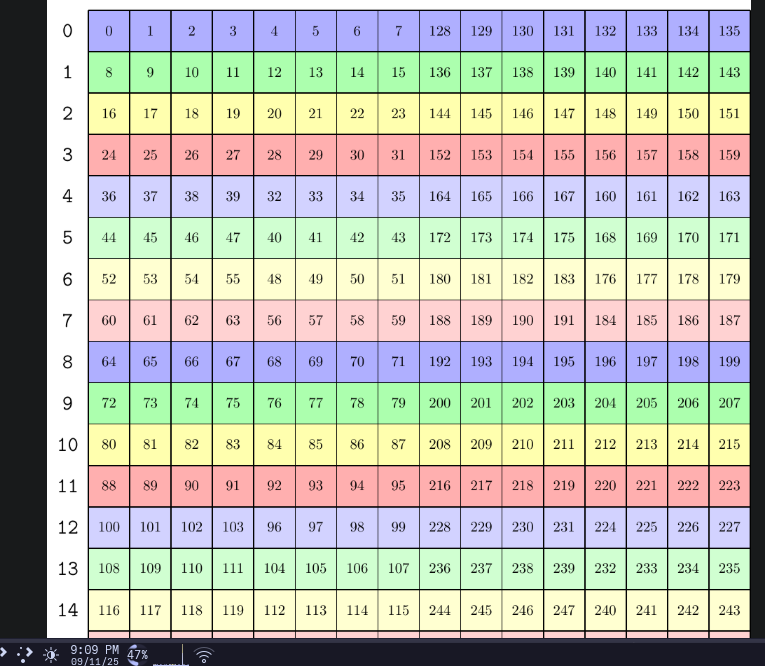

"K MAJOR 32 byte swizzle TF32 they say" 

Exact layout : Swizzle<1,4,3> o ((8,2),(4,4)):((8,64),(1,4))

Canonical Layout :Swizzle<1,4,3> o ((8,m),(T,2k)):((2T,SBO),(1,T))


In [6]:
%%cuda 
#include<stdio.h> 
#include <cute/tensor.hpp>




using namespace cute;


int main() {
    
    // 1. --- SET YOUR PARAMS HERE ---
    
    // Swizzle<BBits, MBase, SShift>
    using MySwizzle = Swizzle<1, 4, 3>;

    // Shape: (8, 2, 4, 4)
    auto shape = make_shape(Int<8>{}, Int<2>{}, Int<4>{}, Int<4>{});

    // Stride: (8, 64, 1, 4)
    auto stride = make_stride(Int<8>{}, Int<64>{}, Int<1>{}, Int<4>{});
    
    // ---------------------------------
    
    
    // --- CUTE Logic (runs on CPU) ---
    
    // Calculate total number of elements
    const int N_ELEMS = size(shape);

    // Create the layout, swizzle function, and composed layout
    auto layout = make_layout(shape, stride);
    MySwizzle swizzle_fn;
    auto swizzled_layout = composition(swizzle_fn, layout);
    
    
    // --- Print the results ---

    // Print the regular layout on one line
    for (int i = 0; i < N_ELEMS; i++) {
        printf("%d", layout(i));
        if (i < N_ELEMS - 1) {
            printf(",");
        }
    }
    printf("\n"); // Newline for the next layout
    
    // Print the swizzled layout on a second line
    for (int i = 0; i < N_ELEMS; i++) {
        printf("%d", swizzled_layout(i));
        if (i < N_ELEMS - 1) {
            printf(",");
        }
    }
    printf("\n"); // Final newline
            
    return 0;
}

UsageError: Cell magic `%%cuda` not found.


In [ ]:
#Swizzle<1,4,3> o ((8,2),(4,4)):((8,64),(1,4))
b_bits = 1
m_base = 4
s_shift = 3
shape = (8,2,4,4)
stride = (8,64,1,4)
L = Swizzled_layout(shape, stride, m_base, b_bits, s_shift)

In [ ]:
L_verif = np.array([0,8,16,24,32,40,48,56,64,72,80,88,96,104,112,120,1,9,17,25,33,41,49,57,65,73,81,89,97,105,113,121,2,10,18,26,34,42,50,58,66,74,82,90,98,106,114,122,3,11,19,27,35,43,51,59,67,75,83,91,99,107,115,123,4,12,20,28,36,44,52,60,68,76,84,92,100,108,116,124,5,13,21,29,37,45,53,61,69,77,85,93,101,109,117,125,6,14,22,30,38,46,54,62,70,78,86,94,102,110,118,126,7,15,23,31,39,47,55,63,71,79,87,95,103,111,119,127,8,16,24,32,40,48,56,64,72,80,88,96,104,112,120,128,9,17,25,33,41,49,57,65,73,81,89,97,105,113,121,129,10,18,26,34,42,50,58,66,74,82,90,98,106,114,122,130,11,19,27,35,43,51,59,67,75,83,91,99,107,115,123,131,12,20,28,36,44,52,60,68,76,84,92,100,108,116,124,132,13,21,29,37,45,53,61,69,77,85,93,101,109,117,125,133,14,22,30,38,46,54,62,70,78,86,94,102,110,118,126,134,15,23,31,39,47,55,63,71,79,87,95,103,111,119,127,135])
L_swiz_verif = np.array([0,8,16,24,32,40,48,56,64,72,80,88,96,104,112,120,1,9,17,25,33,41,49,57,65,73,81,89,97,105,113,121,2,10,18,26,34,42,50,58,66,74,82,90,98,106,114,122,3,11,19,27,35,43,51,59,67,75,83,91,99,107,115,123,4,12,20,28,36,44,52,60,68,76,84,92,100,108,116,124,5,13,21,29,37,45,53,61,69,77,85,93,101,109,117,125,6,14,22,30,38,46,54,62,70,78,86,94,102,110,118,126,7,15,23,31,39,47,55,63,71,79,87,95,103,111,119,127,8,16,24,32,40,48,56,64,72,80,88,96,104,112,120,144,9,17,25,33,41,49,57,65,73,81,89,97,105,113,121,145,10,18,26,34,42,50,58,66,74,82,90,98,106,114,122,146,11,19,27,35,43,51,59,67,75,83,91,99,107,115,123,147,12,20,28,36,44,52,60,68,76,84,92,100,108,116,124,148,13,21,29,37,45,53,61,69,77,85,93,101,109,117,125,149,14,22,30,38,46,54,62,70,78,86,94,102,110,118,126,150,15,23,31,39,47,55,63,71,79,87,95,103,111,119,127,151
])

In [ ]:
L_verif.shape
L_swiz_verif.shape

(256,)

In [ ]:
print(np.allclose(L.realized_layout, L_verif))
print(np.allclose(L.final_layout, L_swiz_verif))

True
True


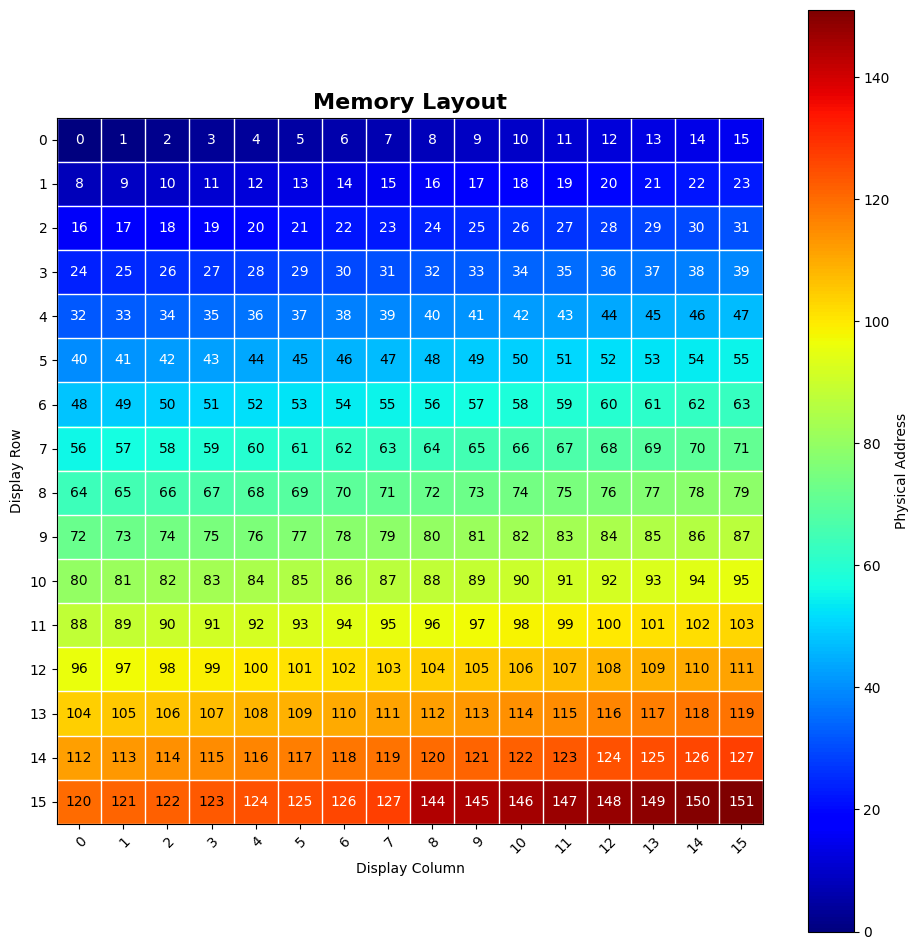

In [ ]:
d = Draw(L.final_layout, display_dim = 16, order = "col")
d.show()

In [8]:
shape = (2,3,4)
stride = (5,4,2)

Layout_dict = {}
draws_dict = {}
perms = [(0,1,2), (0,2,1),(1,0,2),(1,2,0), (2,0,1), (2,1,0)]
for p in perms: 
  x,y,z = p 
  shape_new = (shape[x], shape[y], shape[z])
  stride_new = (stride[x], stride[y], stride[z])
  Layout_dict[p] = Layout(shape_new, stride_new)
  Layout_dict[p].realize()
  draws_dict[p] = Draw(Layout_dict[p].realized_layout, display_dim=24)

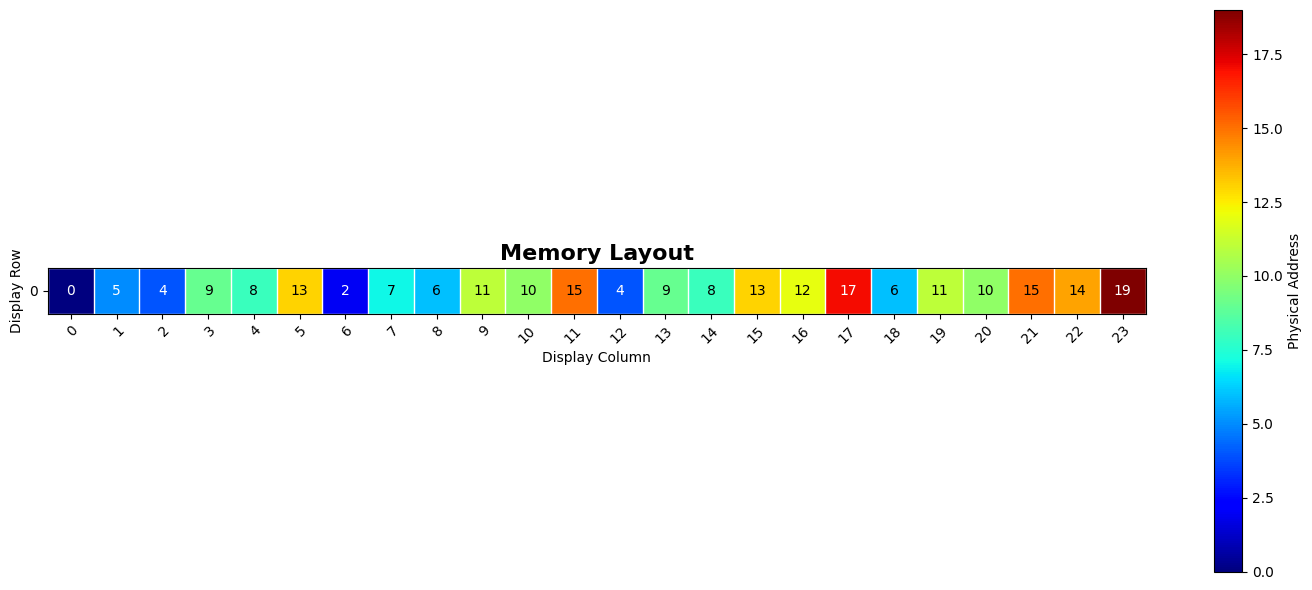

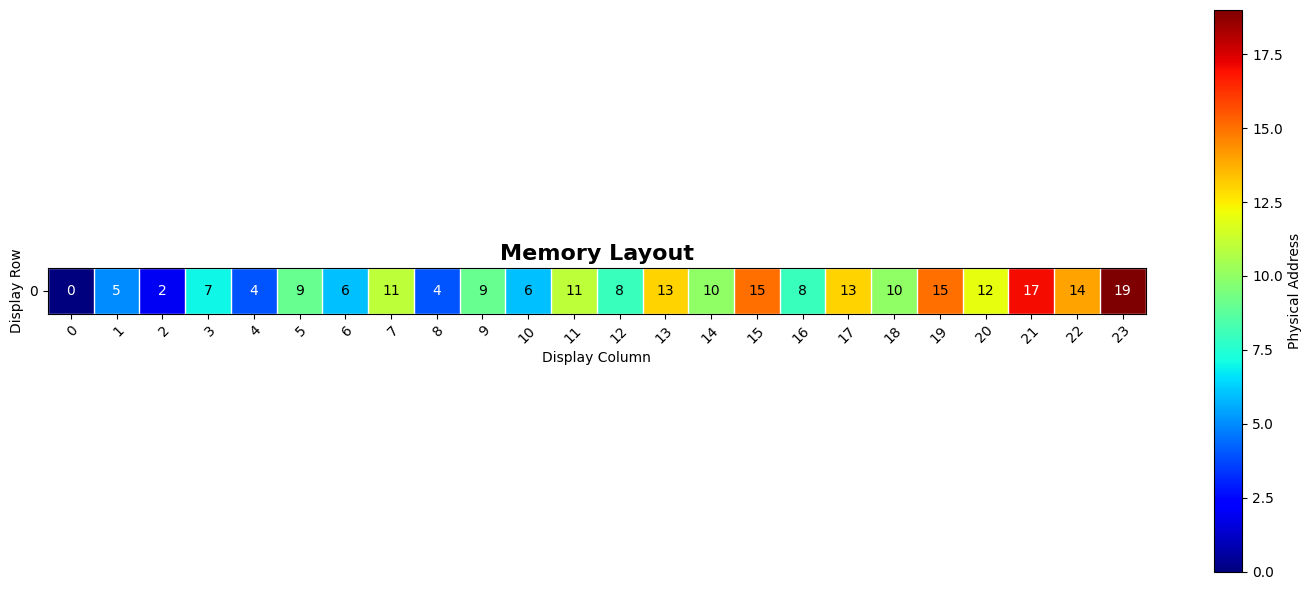

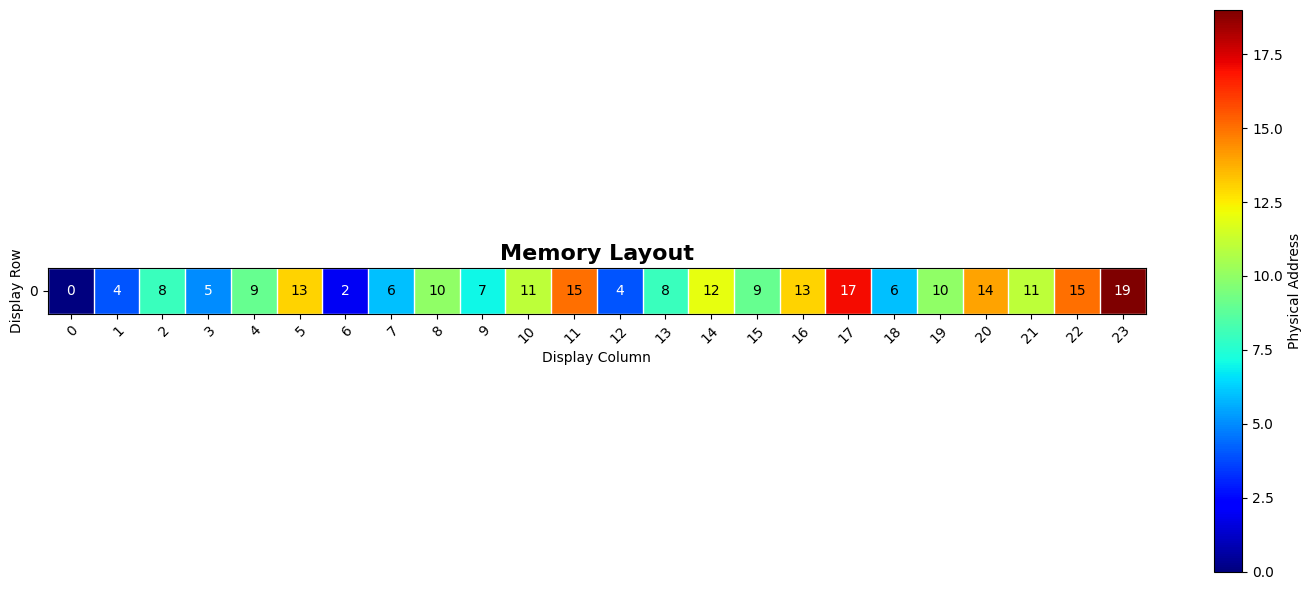

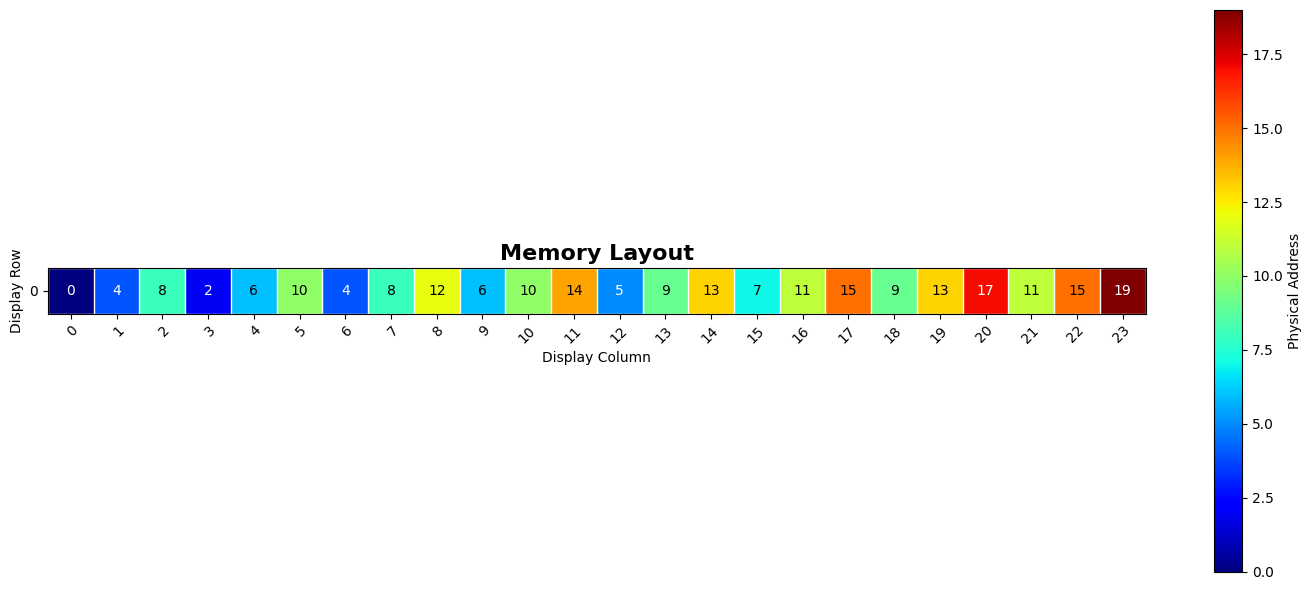

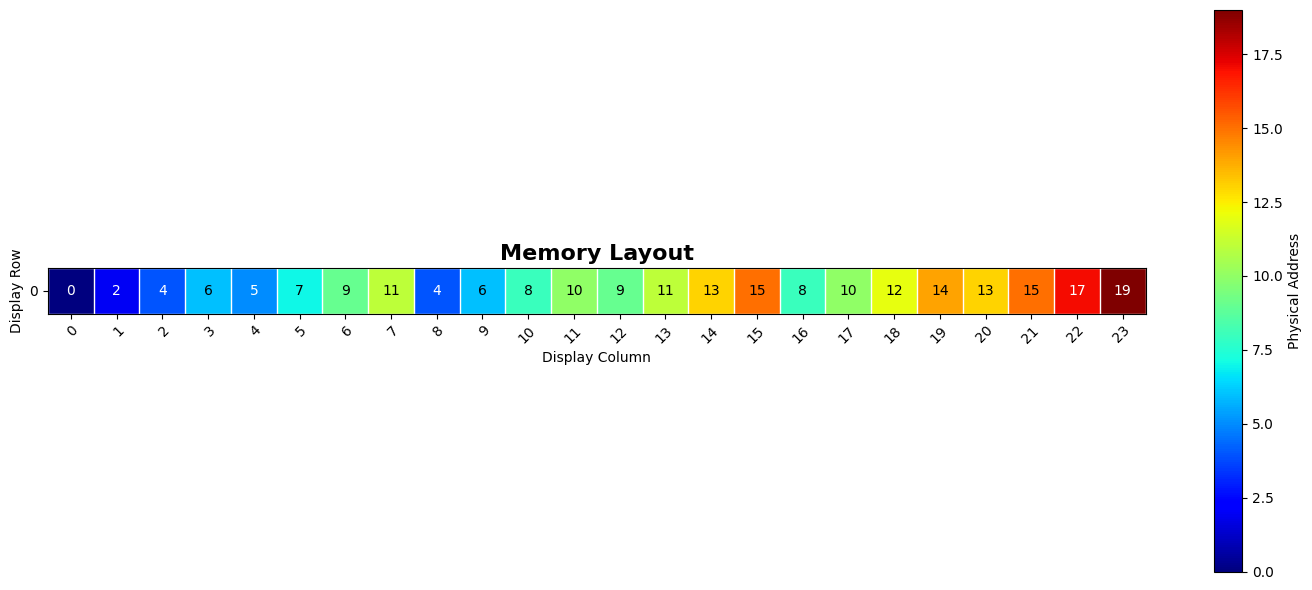

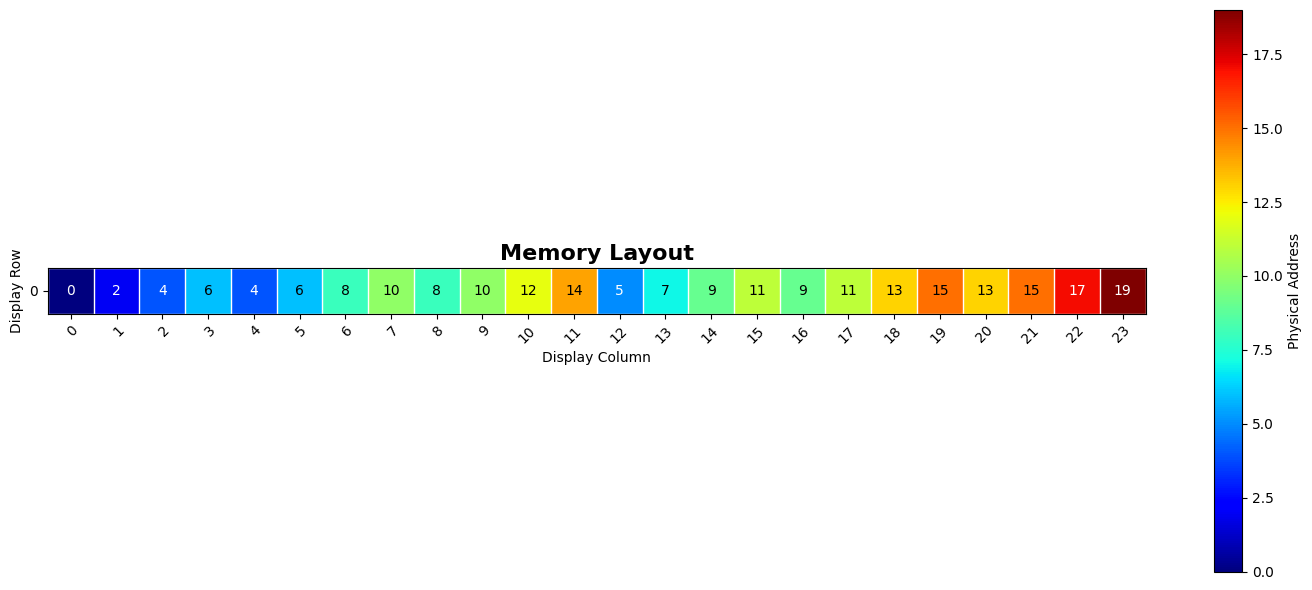

In [9]:
for p in perms: 
  draws_dict[p].show()

In [10]:
def filter(shape,stride): 
  new_shape = []
  new_stride = []
  for i in range(len(shape)):
    if stride[i] > 0:
      new_shape.append(shape[i])
      new_stride.append(stride[i])
      
  return tuple(new_shape), tuple(new_stride)



In [11]:
shape_unf = (3,2,7,4)
stride_unf = (8,0,3,0)

shape_fil, stride_fil = filter(shape_unf, stride_unf)

In [12]:
L_unf = Layout(shape_unf, stride_unf)
L_fil = Layout(shape_fil, stride_fil)

In [13]:
L_unf.realize()
L_fil.realize()
d_unf = Draw(L_unf.realized_layout, 14)
d_fil = Draw(L_fil.realized_layout, 14)

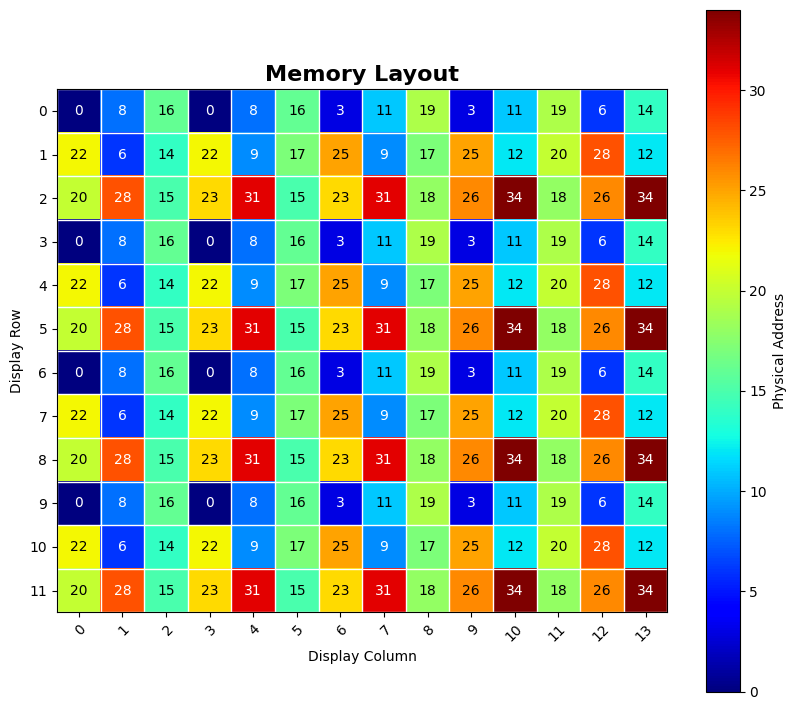

In [14]:
d_unf.show()

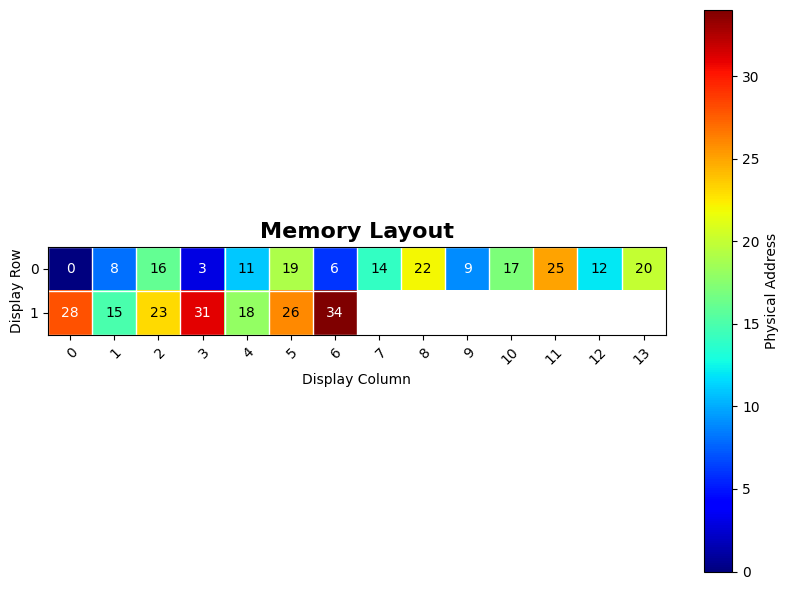

In [15]:
d_fil.show()

In [16]:
p0 = Layout_dict[(0,1,2)].realized_layout
p1 = Layout_dict[(0,2,1)].realized_layout

In [17]:
p0

array([ 0,  5,  4,  9,  8, 13,  2,  7,  6, 11, 10, 15,  4,  9,  8, 13, 12,
       17,  6, 11, 10, 15, 14, 19])

In [18]:
p1

array([ 0,  5,  2,  7,  4,  9,  6, 11,  4,  9,  6, 11,  8, 13, 10, 15,  8,
       13, 10, 15, 12, 17, 14, 19])

In [ ]:
Domain = np.arange()